In [1]:
#读取2001文件夹中的cdf文件

import os
os.environ["CDF_LIB"] ='cdf/lib'

import numpy as np



In [17]:
from spacepy import pycdf
#创建一个空的数组
data = np.array([])
for i in range(365):
    cdf_file = pycdf.CDF(f'data/2001/gps{i+1}.cdf')
    var_data = cdf_file['tecIGS']
    #转换为numpy数组
    datap = np.array(var_data)
    #将datap添加到data中
    if i == 0:
        data = datap
    else:
        data = np.vstack((data,datap))
    pycdf.CDF.close(cdf_file)
print(data.shape)


(4380, 71, 73)


In [18]:
#保存data为npy文件
np.save('data_365.npy',data)


In [28]:
#读取npy文件
data = np.load('../data/data_365.npy')

In [29]:
#统计data的数值分布
count = np.count_nonzero(data > 1000)

print(count)


3


In [30]:
#将值大于1505210099的值置为线性插值
data[data>1000] = 0

(4380, 71, 73)


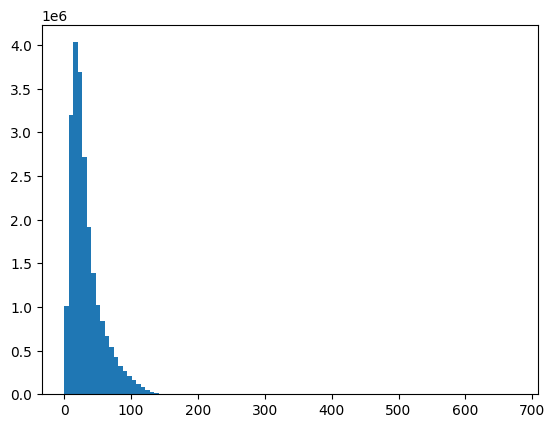

In [31]:
print(data.shape)
#绘制直方图
import matplotlib.pyplot as plt
plt.hist(data.reshape(-1,1),bins=100)
plt.show()

In [32]:
data_min = np.min(data)
data_max = np.max(data)
print("最小值：",data_min)
print("最大值：",data_max)
data_normalized = (data - data_min) / (data_max - data_min)



最小值： 0.0
最大值： 674.5


In [33]:
n=int(data_normalized.shape[0]*0.7)
trainlist=data_normalized[0:n,:,:]
testlist=data_normalized[n:,:,:]
print(trainlist.shape)
print(testlist.shape)

(3066, 71, 73)
(1314, 71, 73)


In [34]:
#滑窗
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for j in range(dataset.shape[0]-look_back):
            a = dataset[j:(j+look_back),:,:]
            dataX.append(a)
            dataY.append(dataset[j + look_back,:,:])
    return np.array(dataX),np.array(dataY)
look_back = 3
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
trainX =np.reshape(trainX, (trainX.shape[0], trainX.shape[1],trainX.shape[2],trainX.shape[3],1))
testX =np.reshape(testX, (testX.shape[0], testX.shape[1],testX.shape[2],testX.shape[3],1))
trainY =np.reshape(trainY, (trainY.shape[0], trainY.shape[1],trainY.shape[2],1))
testY =np.reshape(testY, (testY.shape[0], testY.shape[1],testY.shape[2],1))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(3063, 3, 71, 73, 1)
(3063, 71, 73, 1)
(1311, 3, 71, 73, 1)
(1311, 71, 73, 1)


In [28]:
#保存数据
np.save('trainX.npy',trainX)
np.save('trainY.npy',trainY)
np.save('testX.npy',testX)
np.save('testY.npy',testY)